<a href="https://colab.research.google.com/github/jasleenkaur24/INSE-6220/blob/main/Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

### Install Pycaret

In [ ]:
# Install slim version (default): if you get an error message, run it again
!pip install pycaret[analysis]
!pip install "schemdraw<0.16"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: schemdraw
    Found existing installation: schemdraw 0.16
    Uninstalling schemdraw-0.16:
      Successfully uninstalled schemdraw-0.16


In [ ]:
# Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

## Import Libraries

In [ ]:
import numpy as np

# Open source data analysis and manipulation library for Python
import pandas as pd

# matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,5)

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults
sns.set_theme(style="darkgrid")


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


## Dataset

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [ ]:
# Read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jasleenkaur24/INSE-6220/main/costofL.csv')
df.head(15)

MIR    MMR   McD    DB    IB    CA    CO    WA  class
0   4.90  22.04  4.28  1.84  3.67  1.78  0.48  0.19      1
1   5.59  40.51  5.59  1.12  4.19  3.96  0.52  0.32      1
2   2.54  22.25  3.50  2.02  3.18  2.19  0.59  0.27      1
3   3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51      1
4   7.16  52.77  6.03  3.02  4.52  3.86  1.46  0.78      1
5   2.60  28.09  5.62  2.25  4.21  2.06  0.50  0.26      1
6   2.00  14.69  3.67  2.20  3.67  1.60  0.36  0.15      1
7   4.05  27.94  4.89  0.84  1.68  3.41  0.44  0.32      1
8   3.67  18.36  3.67  2.45  4.28  2.49  0.46  0.19      1
9   4.19  30.73  5.59  1.40  4.05  4.55  0.51  0.43      1
10  7.22  43.31  5.47  3.25  3.61  3.19  1.17  0.78      1
11  3.38  45.06  6.76  1.13  1.80  3.40  0.39  0.26      1
12  2.23  11.14  3.56  2.12  2.67  1.39  0.29  0.18      1
13  1.87  11.24  4.68  5.62  4.92  1.89  0.27  0.15      1
14  7.45  37.27  6.52  2.24  3.35  1.51  1.08  0.75      1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIR     1034 non-null   float64
 1   MMR     1034 non-null   float64
 2   McD     1034 non-null   float64
 3   DB      1034 non-null   float64
 4   IB      1034 non-null   float64
 5   CA      1034 non-null   float64
 6   CO      1034 non-null   float64
 7   WA      1034 non-null   float64
 8   class   1034 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 72.8 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## Exploratory Data Analysis

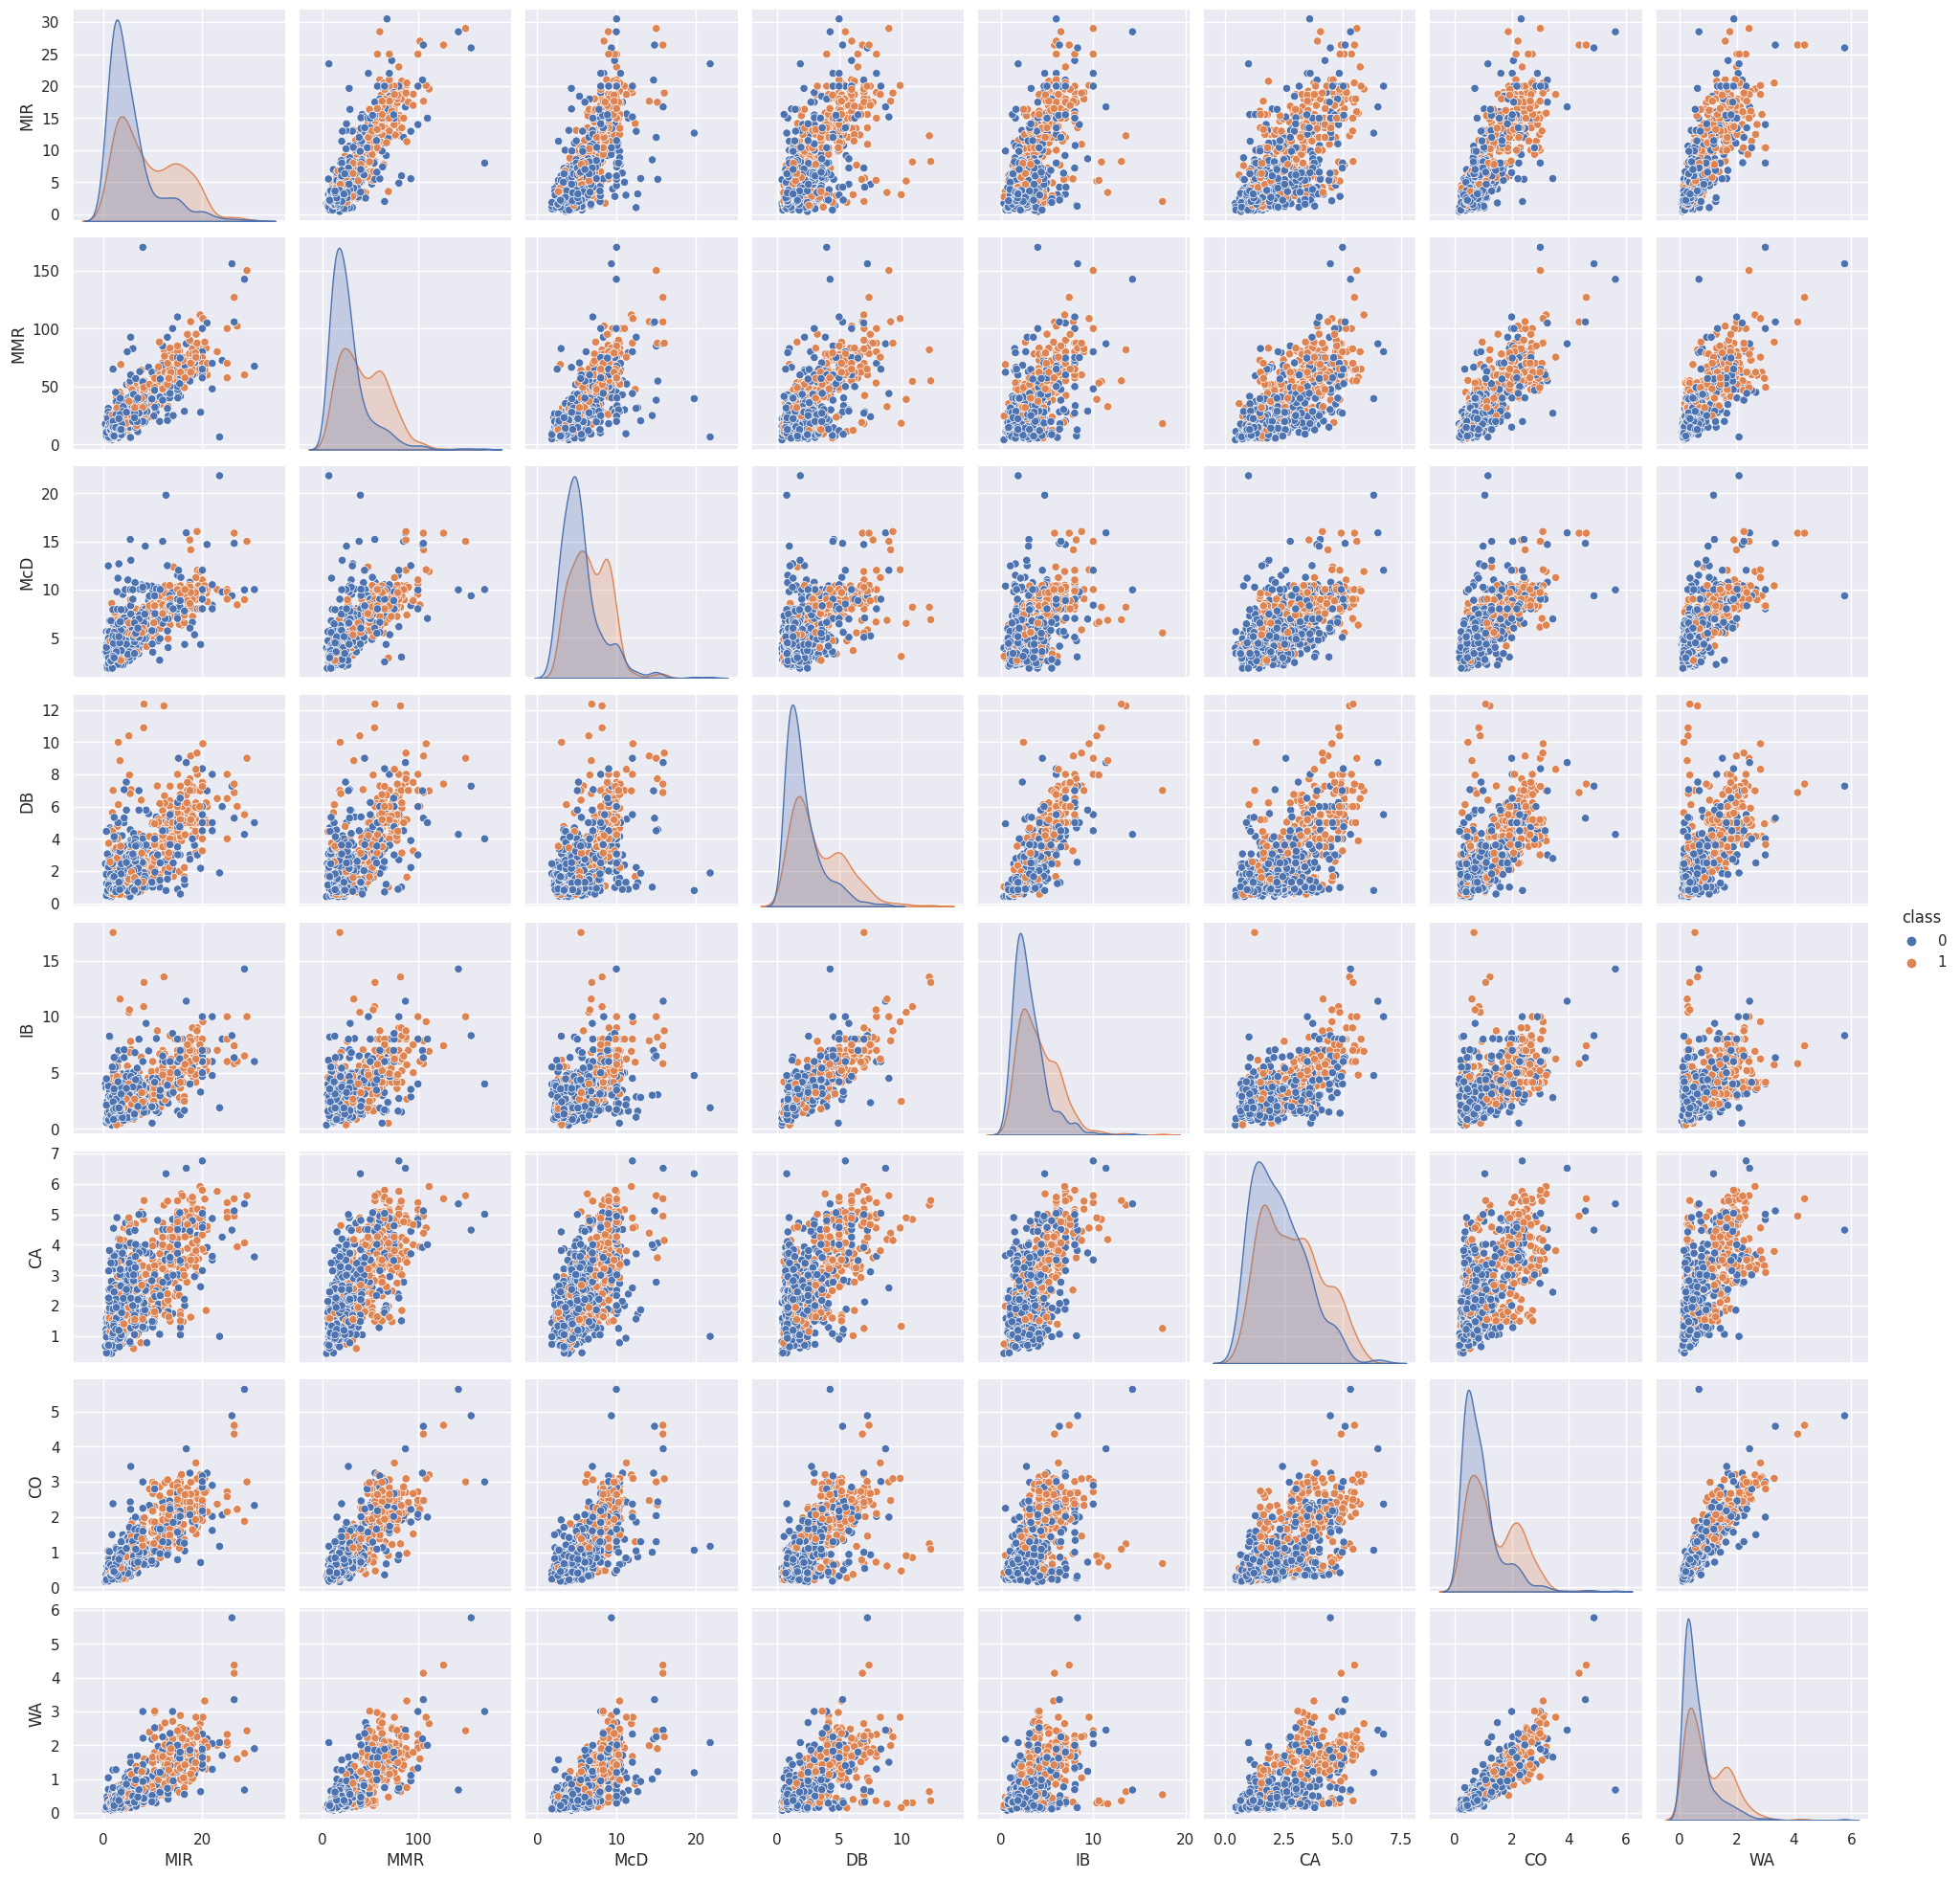

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

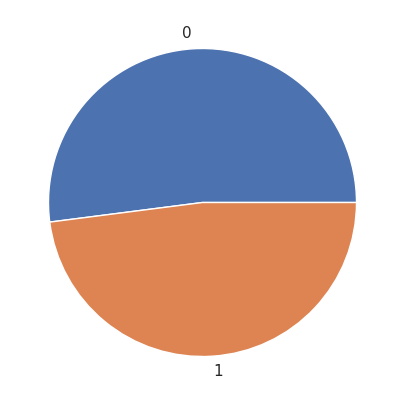

In [ ]:
y = df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

### Data Matrix

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

MIR    MMR   McD    DB    IB    CA    CO    WA
0  4.90  22.04  4.28  1.84  3.67  1.78  0.48  0.19
1  5.59  40.51  5.59  1.12  4.19  3.96  0.52  0.32
2  2.54  22.25  3.50  2.02  3.18  2.19  0.59  0.27
3  3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51
4  7.16  52.77  6.03  3.02  4.52  3.86  1.46  0.78
5  2.60  28.09  5.62  2.25  4.21  2.06  0.50  0.26
6  2.00  14.69  3.67  2.20  3.67  1.60  0.36  0.15
7  4.05  27.94  4.89  0.84  1.68  3.41  0.44  0.32
8  3.67  18.36  3.67  2.45  4.28  2.49  0.46  0.19
9  4.19  30.73  5.59  1.40  4.05  4.55  0.51  0.43

In [ ]:
X.describe().transpose()

count       mean        std   min      25%     50%      75%     max
MIR  1034.0   7.431499   5.908978  0.45   2.7900   5.405  11.1700   30.50
MMR  1034.0  34.989710  23.865557  4.11  17.3275  27.940  50.0000  170.00
McD  1034.0   6.062215   2.572885  1.84   4.1900   5.580   7.9200   21.81
DB   1034.0   2.702544   1.929798  0.41   1.3000   2.000   3.6400   12.36
IB   1034.0   3.561190   2.045738  0.34   2.0625   3.030   4.5200   17.50
CA   1034.0   2.566470   1.230560  0.43   1.5600   2.415   3.4075    6.75
CO   1034.0   1.124516   0.797667  0.16   0.4900   0.890   1.6075    5.63
WA   1034.0   0.793027   0.674039  0.08   0.2900   0.555   1.1500    5.77

### Standardize the Data

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns

X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

MIR       MMR       McD        DB        IB        CA        CO  \
0 -0.428623 -0.542873 -0.693026 -0.447177  0.053215 -0.639425 -0.808393   
1 -0.311795  0.231420 -0.183624 -0.820453  0.307525  1.132984 -0.758222   
2 -0.828209 -0.534070 -0.996335 -0.353858 -0.186424 -0.306082 -0.670424   
3 -0.658893 -0.318173 -0.980780 -0.758241 -0.812417  0.279301 -0.243975   
4 -0.045969  0.745379 -0.012527  0.164582  0.468914  1.051681  0.420785   
5 -0.818050 -0.289247 -0.171958 -0.234617  0.317306 -0.411776 -0.783308   
6 -0.919639 -0.850998 -0.930229 -0.260539  0.053215 -0.785770 -0.958904   
7 -0.572542 -0.295536 -0.455824 -0.965617 -0.920010  0.685816 -0.858563   
8 -0.636882 -0.697145 -0.930229 -0.130929  0.351540 -0.062173 -0.833478   
9 -0.548837 -0.178574 -0.183624 -0.675290  0.239056  1.612672 -0.770765   

         WA  
0 -0.895081  
1 -0.702120  
2 -0.776336  
3 -0.420101  
4 -0.019336  
5 -0.791179  
6 -0.954453  
7 -0.702120  
8 -0.895081  
9 -0.538846

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
MIR  1034.0  1.030768e-17  1.000484 -1.182079 -0.785880 -0.343119  0.632988   
MMR  1034.0 -6.871787e-17  1.000484 -1.294529 -0.740429 -0.295536  0.629256   
McD  1034.0  1.443075e-16  1.000484 -1.641837 -0.728023 -0.187512  0.722412   
DB   1034.0 -1.683588e-16  1.000484 -1.188546 -0.727134 -0.364226  0.486015   
IB   1034.0  1.133845e-16  1.000484 -1.575347 -0.732945 -0.259782  0.468914   
CA   1034.0 -1.511793e-16  1.000484 -1.737017 -0.818292 -0.123150  0.683784   
CO   1034.0  1.202563e-16  1.000484 -1.209757 -0.795850 -0.294145  0.605788   
WA   1034.0 -1.026473e-16  1.000484 -1.058355 -0.746649 -0.353307  0.529859   

          max  
MIR  3.905864  
MMR  5.659856  
McD  6.123633  
DB   5.006809  
IB   6.816881  
CA   3.401341  
CO   5.651060  
WA   7.387383

### Observations and variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

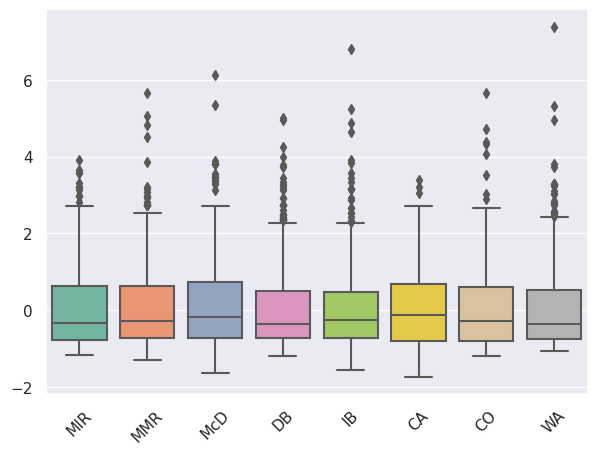

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

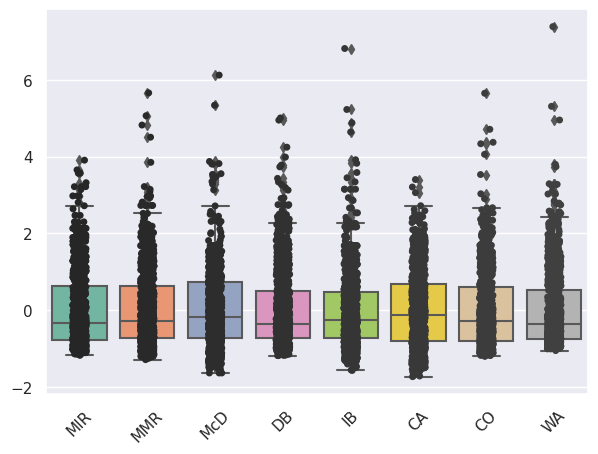

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

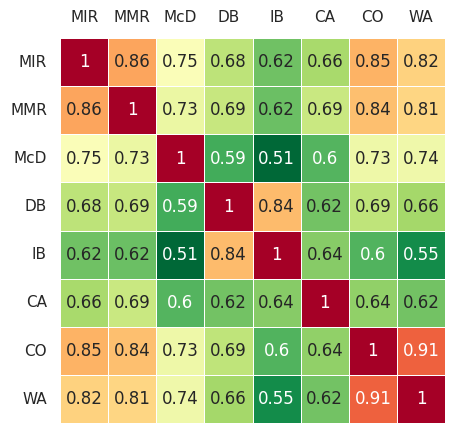

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

In [ ]:
# pca = PCA(n_components=2)
# Retain 95% of useful features and create new dimensions
pca = PCA(0.95)
Z = pca.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of Z:", Z.shape)

Shape of X: (1034, 8)
Shape of Z: (1034, 5)


In [ ]:
pca.n_components_

5

In [ ]:
print(Z)

[[-1.57923253e+00  5.39715181e-01 -1.46137215e-01  4.75683059e-02
   3.85149575e-01]
 [-4.51724077e-01  5.04141287e-01  1.51953504e+00 -5.78436318e-03
   4.37401134e-01]
 [-1.66861190e+00  5.85191057e-01  1.02310501e-01 -3.17817115e-01
   1.73550085e-02]
 ...
 [-9.14274544e-01 -6.48128528e-01  2.97398973e-01  1.27249469e-01
   5.75534091e-01]
 [-1.85764861e+00 -4.90163733e-01 -4.23080798e-01  1.60134034e-01
   3.52256522e-02]
 [ 6.02986672e+00 -4.47348892e-01 -1.33671214e+00 -1.30384102e-01
  -1.06510017e+00]]


Text(0, 0.5, '$Z_2$')

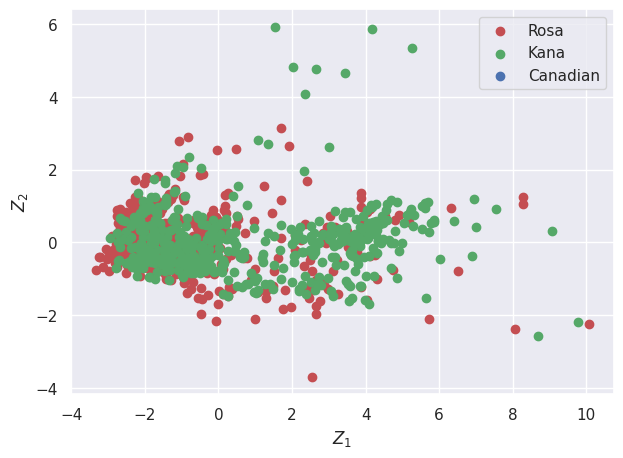

In [ ]:
# 1(Rosa)-> 0,  2(Kama)-> 1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa, 0], Z[idx_Rosa, 1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana, 0], Z[idx_Kana, 1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian, 0], Z[idx_Canadian, 1], c='b', label='Canadian')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

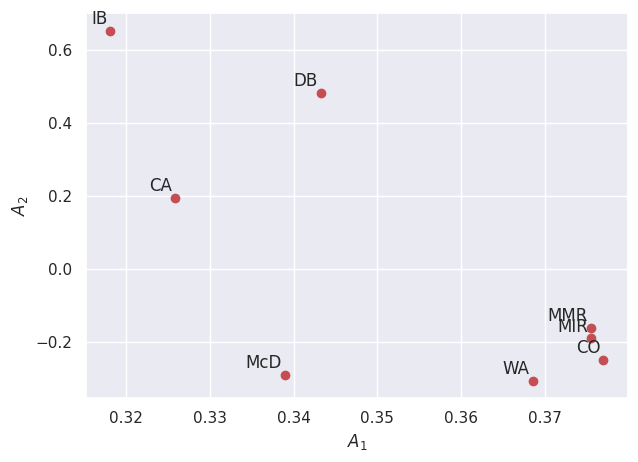

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [ ]:
A

array([[ 0.37555478, -0.1901724 , -0.0612241 , -0.09642194,  0.54331301],
       [ 0.37548329, -0.16139152,  0.03659193, -0.19077207,  0.55517304],
       [ 0.33893424, -0.29065963,  0.08708856,  0.88306685, -0.08439889],
       [ 0.34322837,  0.48267806, -0.33141296,  0.07366281, -0.09633616],
       [ 0.31809163,  0.65347699, -0.15363949,  0.09050109,  0.0332833 ],
       [ 0.3257938 ,  0.1947461 ,  0.88211368, -0.15724427, -0.18670349],
       [ 0.37700712, -0.24844945, -0.18991508, -0.27646299, -0.31092301],
       [ 0.36855191, -0.30600777, -0.19923928, -0.24439224, -0.49754492]])

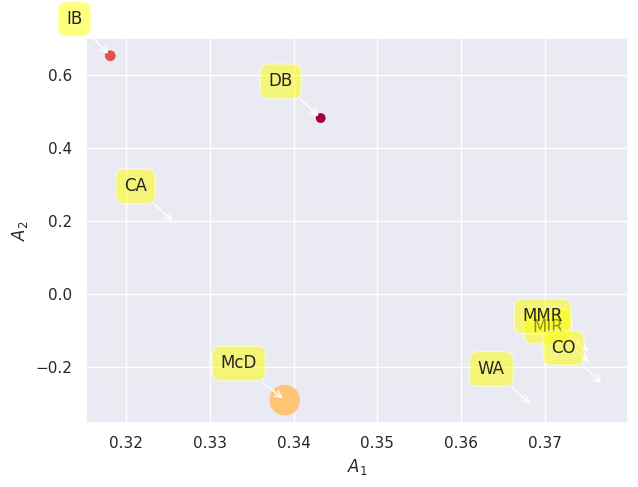

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

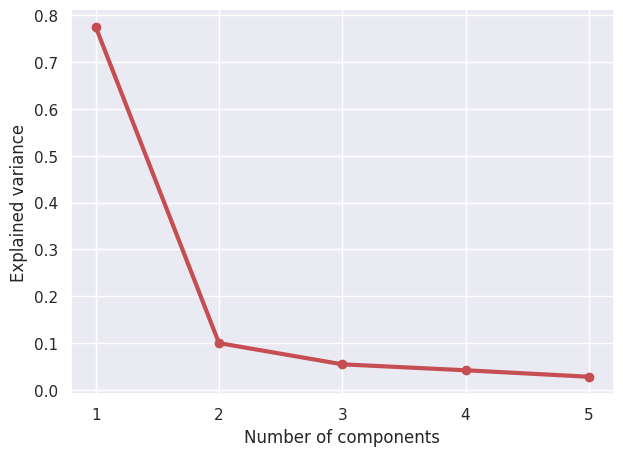

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

In [ ]:
Lambda

array([5.92375751, 0.76441162, 0.41814427, 0.32118619, 0.21540919])

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

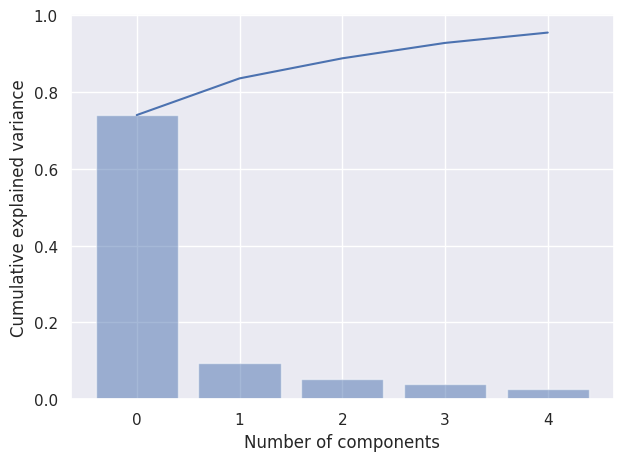

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

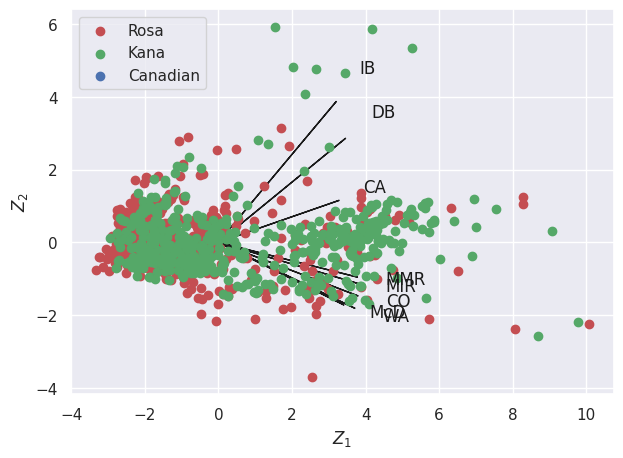

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0    -1.579233  0.539715 -0.146137  0.047568  0.385150
1    -0.451724  0.504141  1.519535 -0.005784  0.437401
2    -1.668612  0.585191  0.102311 -0.317817  0.017355
3    -1.373827 -0.191593  0.695803 -0.745042 -0.173113
4     0.958158  0.384134  0.754051 -0.371243  0.072085
...        ...       ...       ...       ...       ...
1029  0.958871  0.574439  0.803591 -0.536480  0.077846
1030 -2.032860  0.894537  0.334050 -0.353144 -0.265437
1031 -0.914275 -0.648129  0.297399  0.127249  0.575534
1032 -1.857649 -0.490164 -0.423081  0.160134  0.035226
1033  6.029867 -0.447349 -1.336712 -0.130384 -1.065100

[1034 rows x 5 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.33%] of the variance'}, xlabel='PC1 (73.9% expl.var)', ylabel='PC2 (9.54% expl.var)'>)

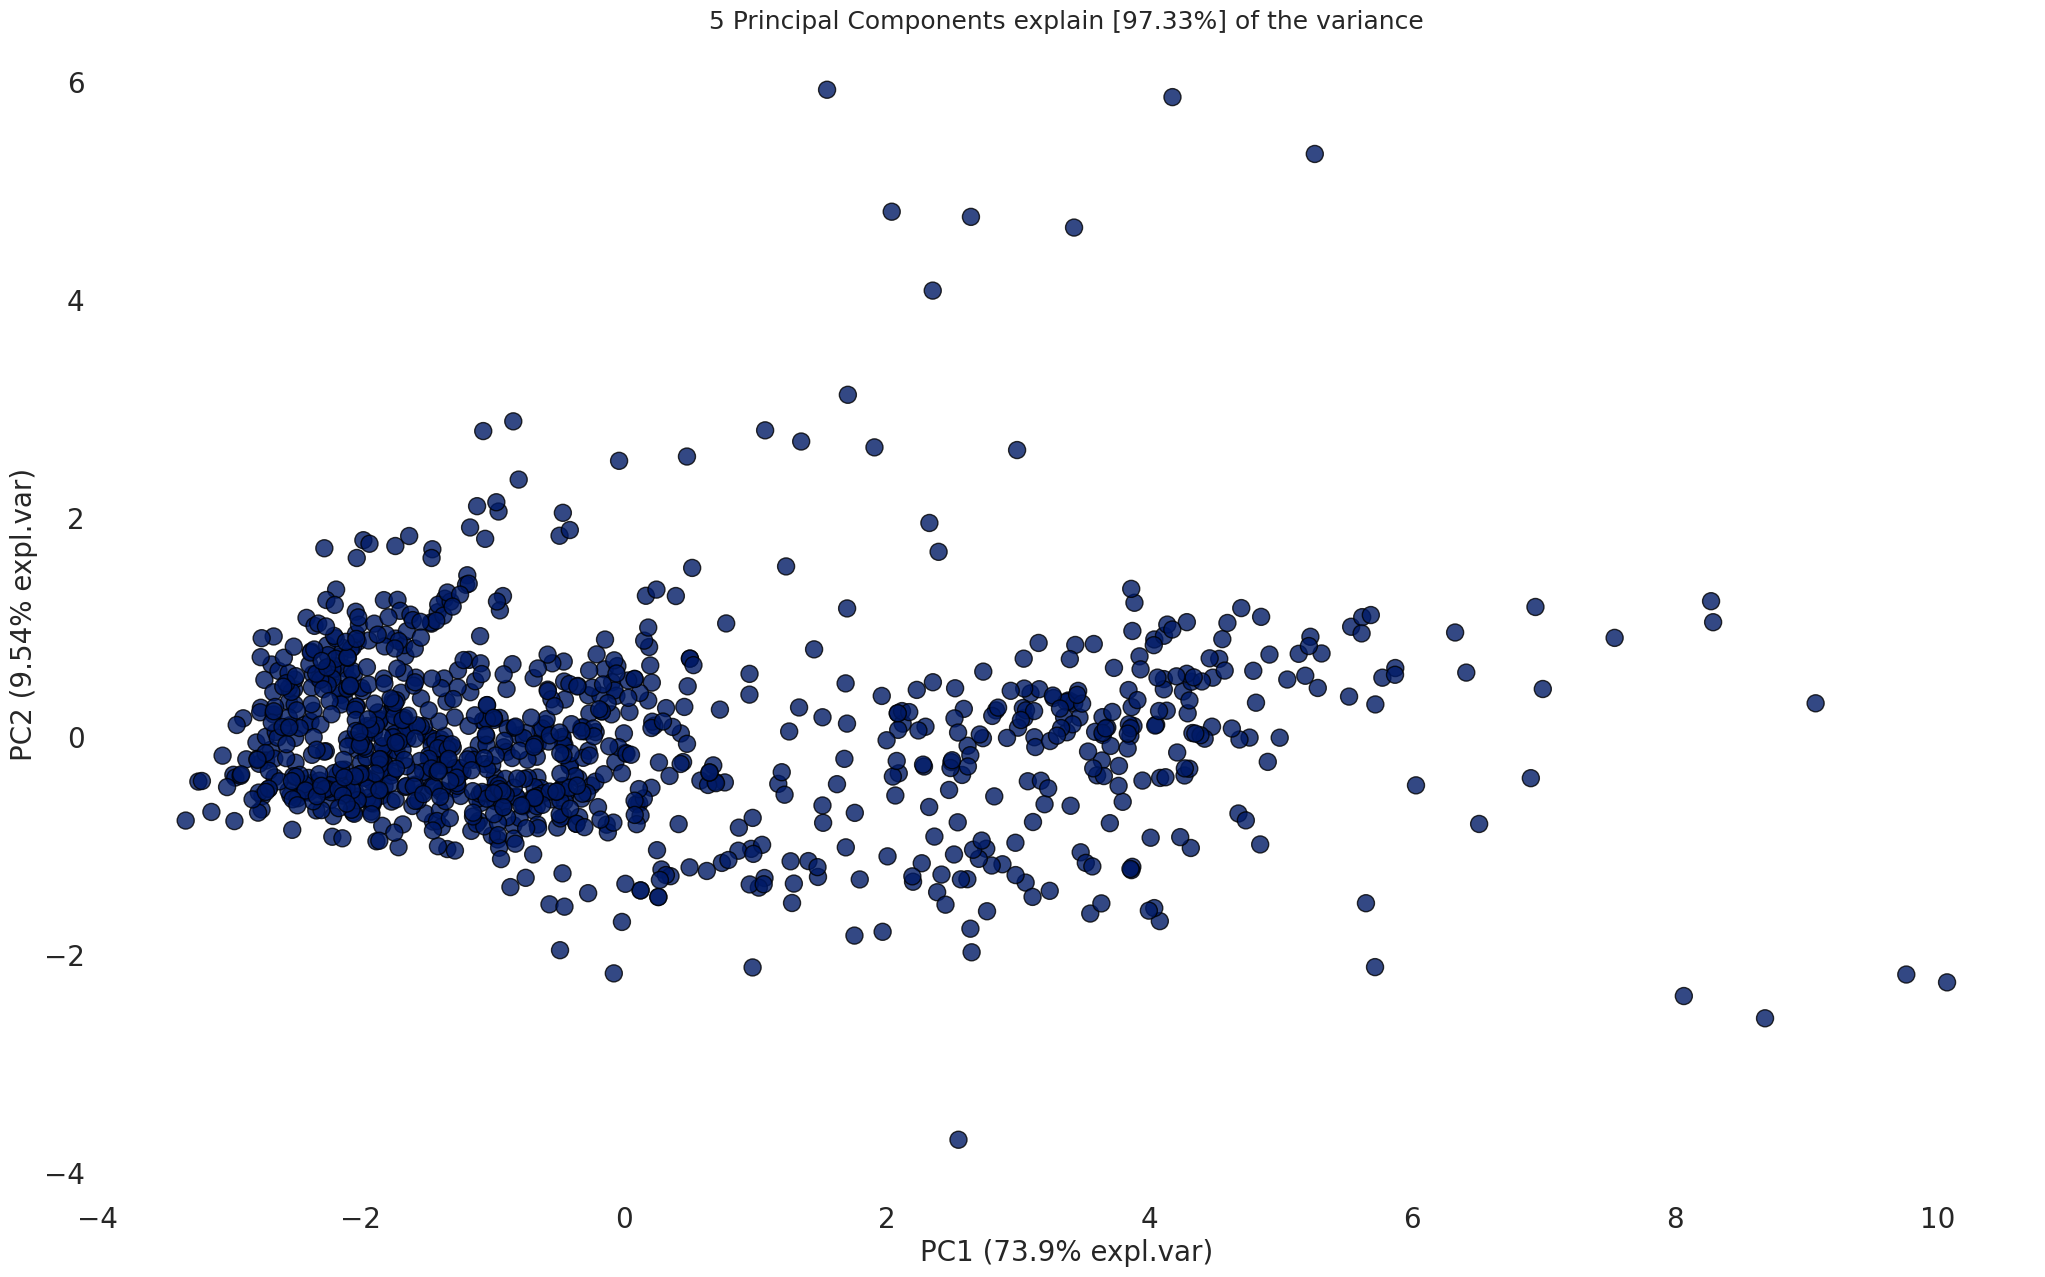

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

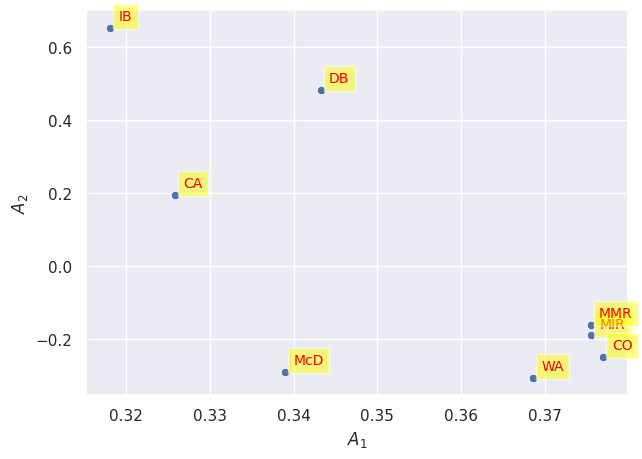

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.001,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

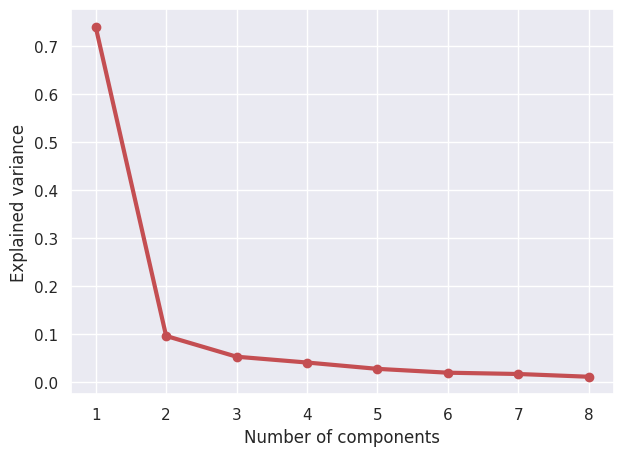

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

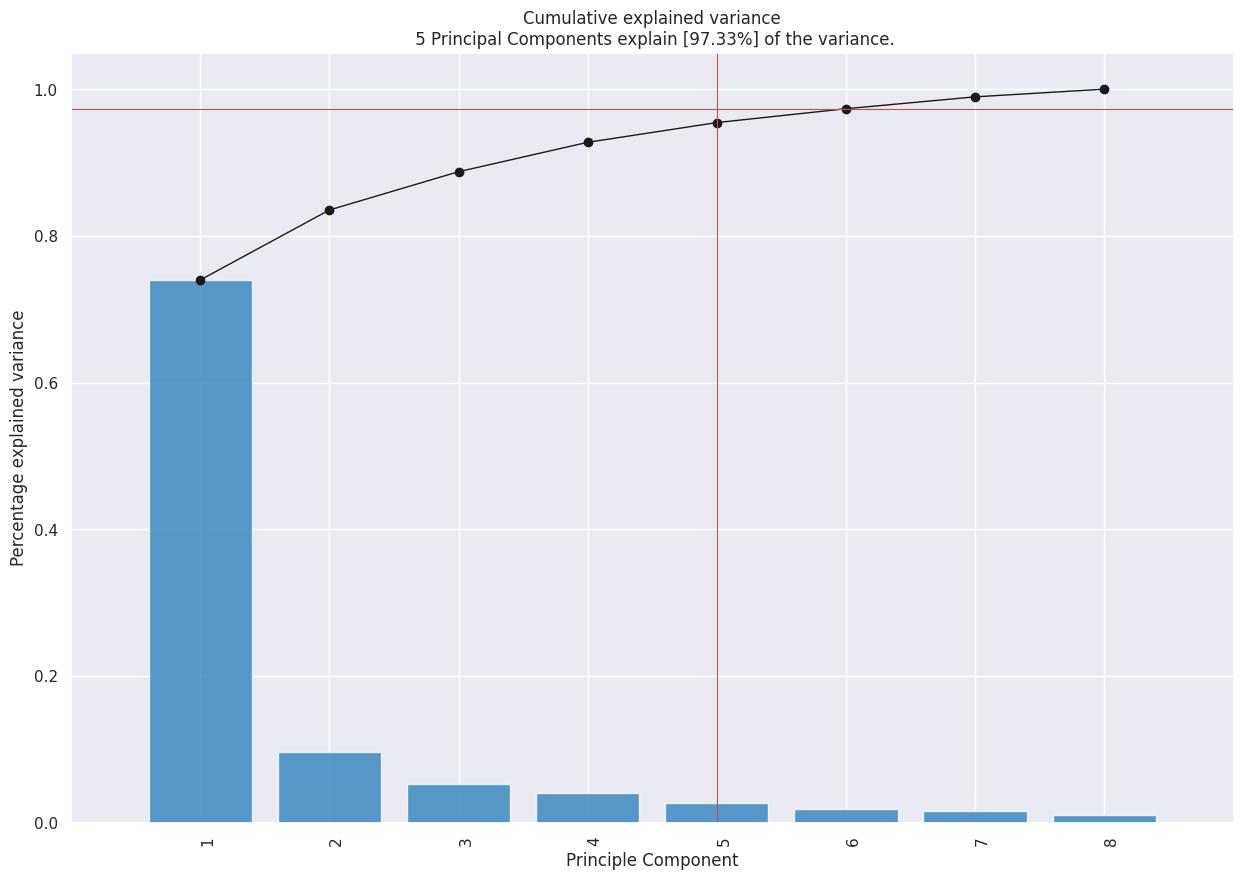

<Figure size 700x500 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


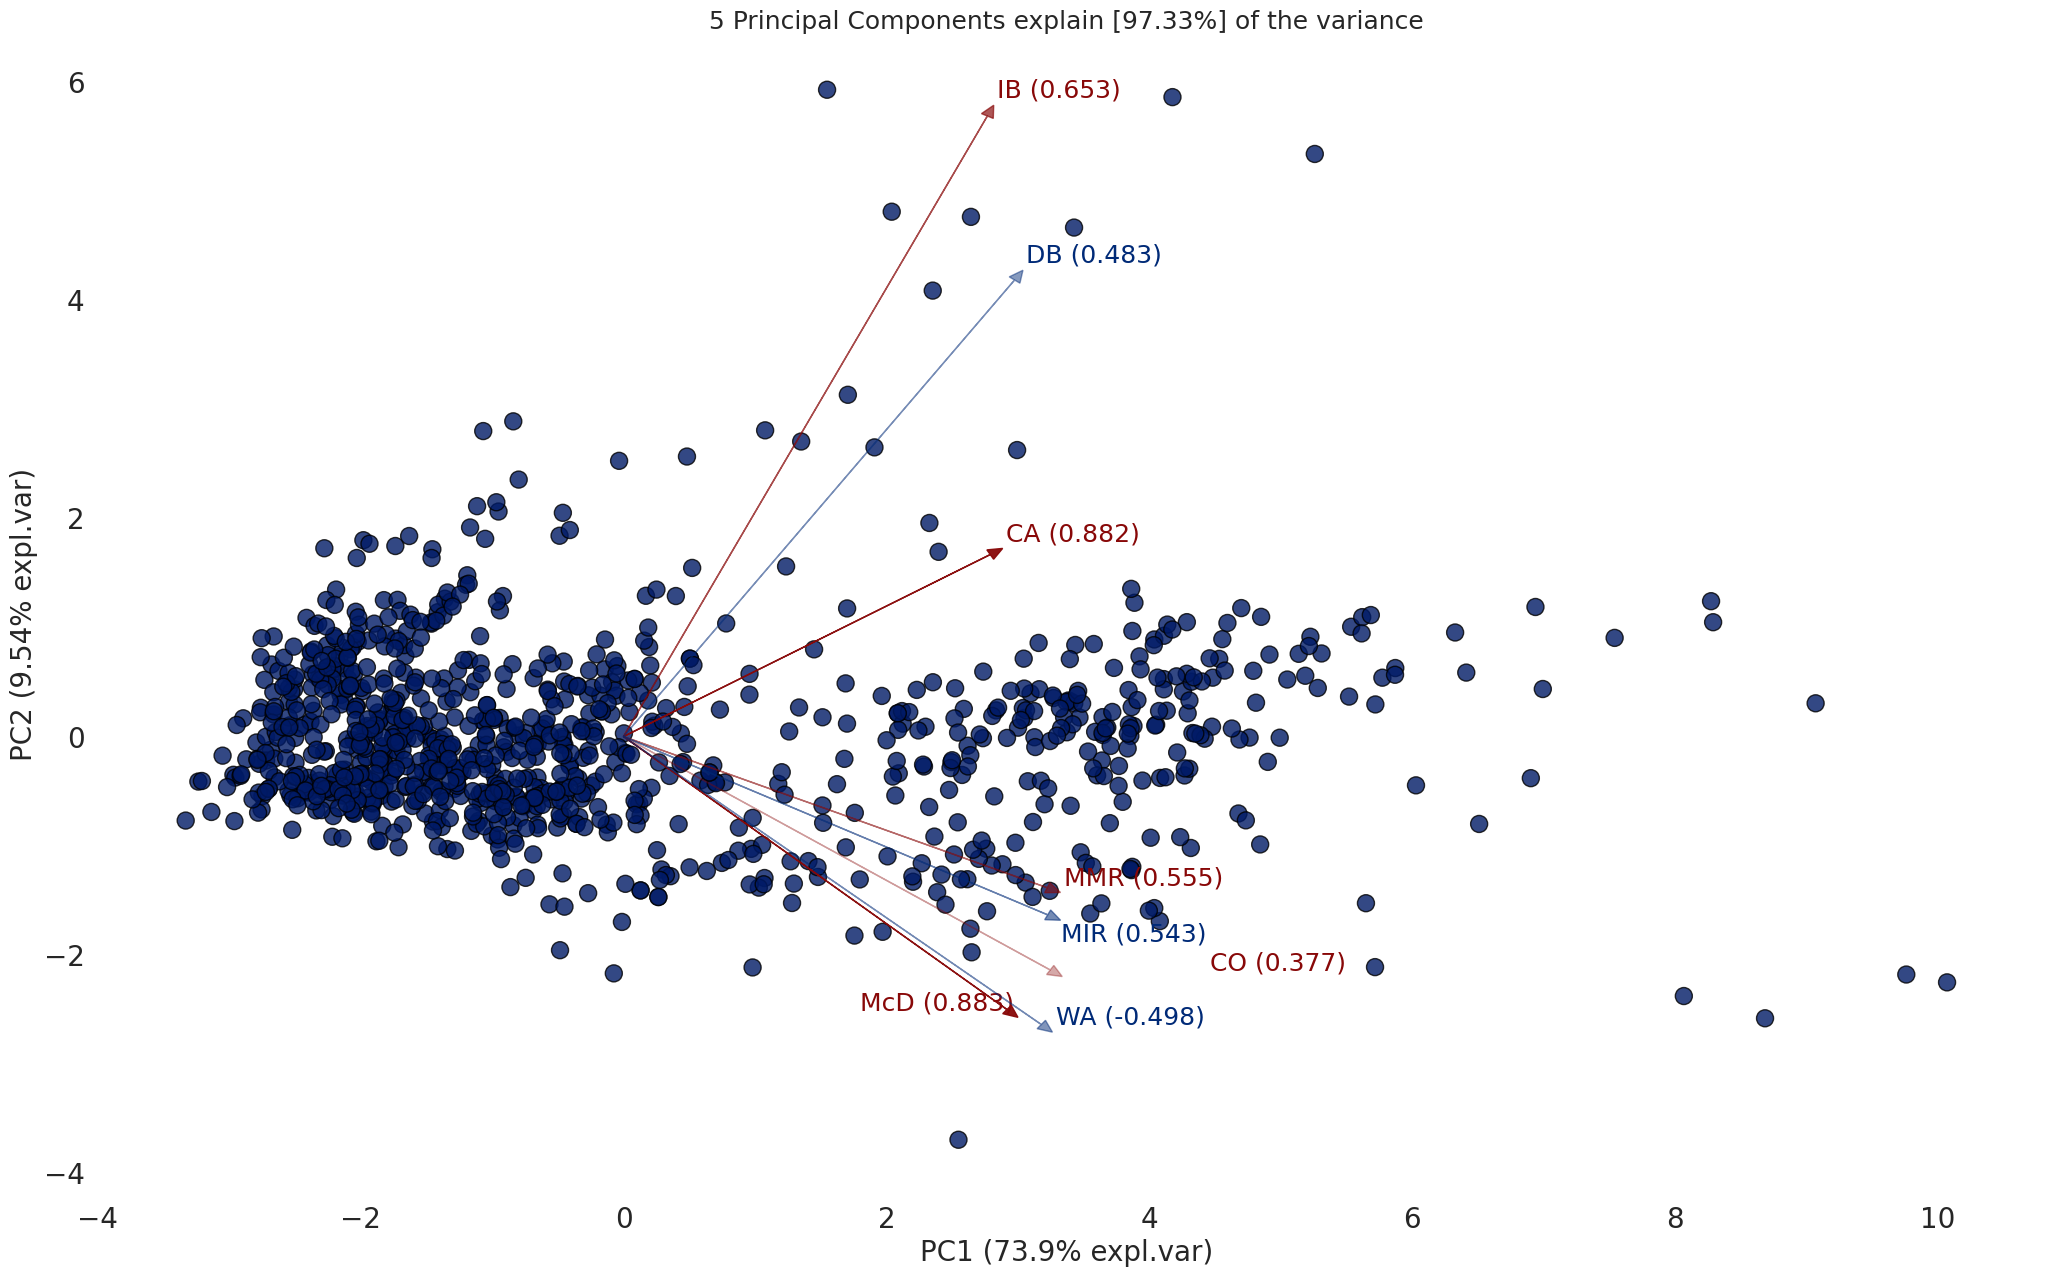

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [97.33%] of the variance'}, xlabel='PC1 (73.9% expl.var)', ylabel='PC2 (9.54% expl.var)'>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


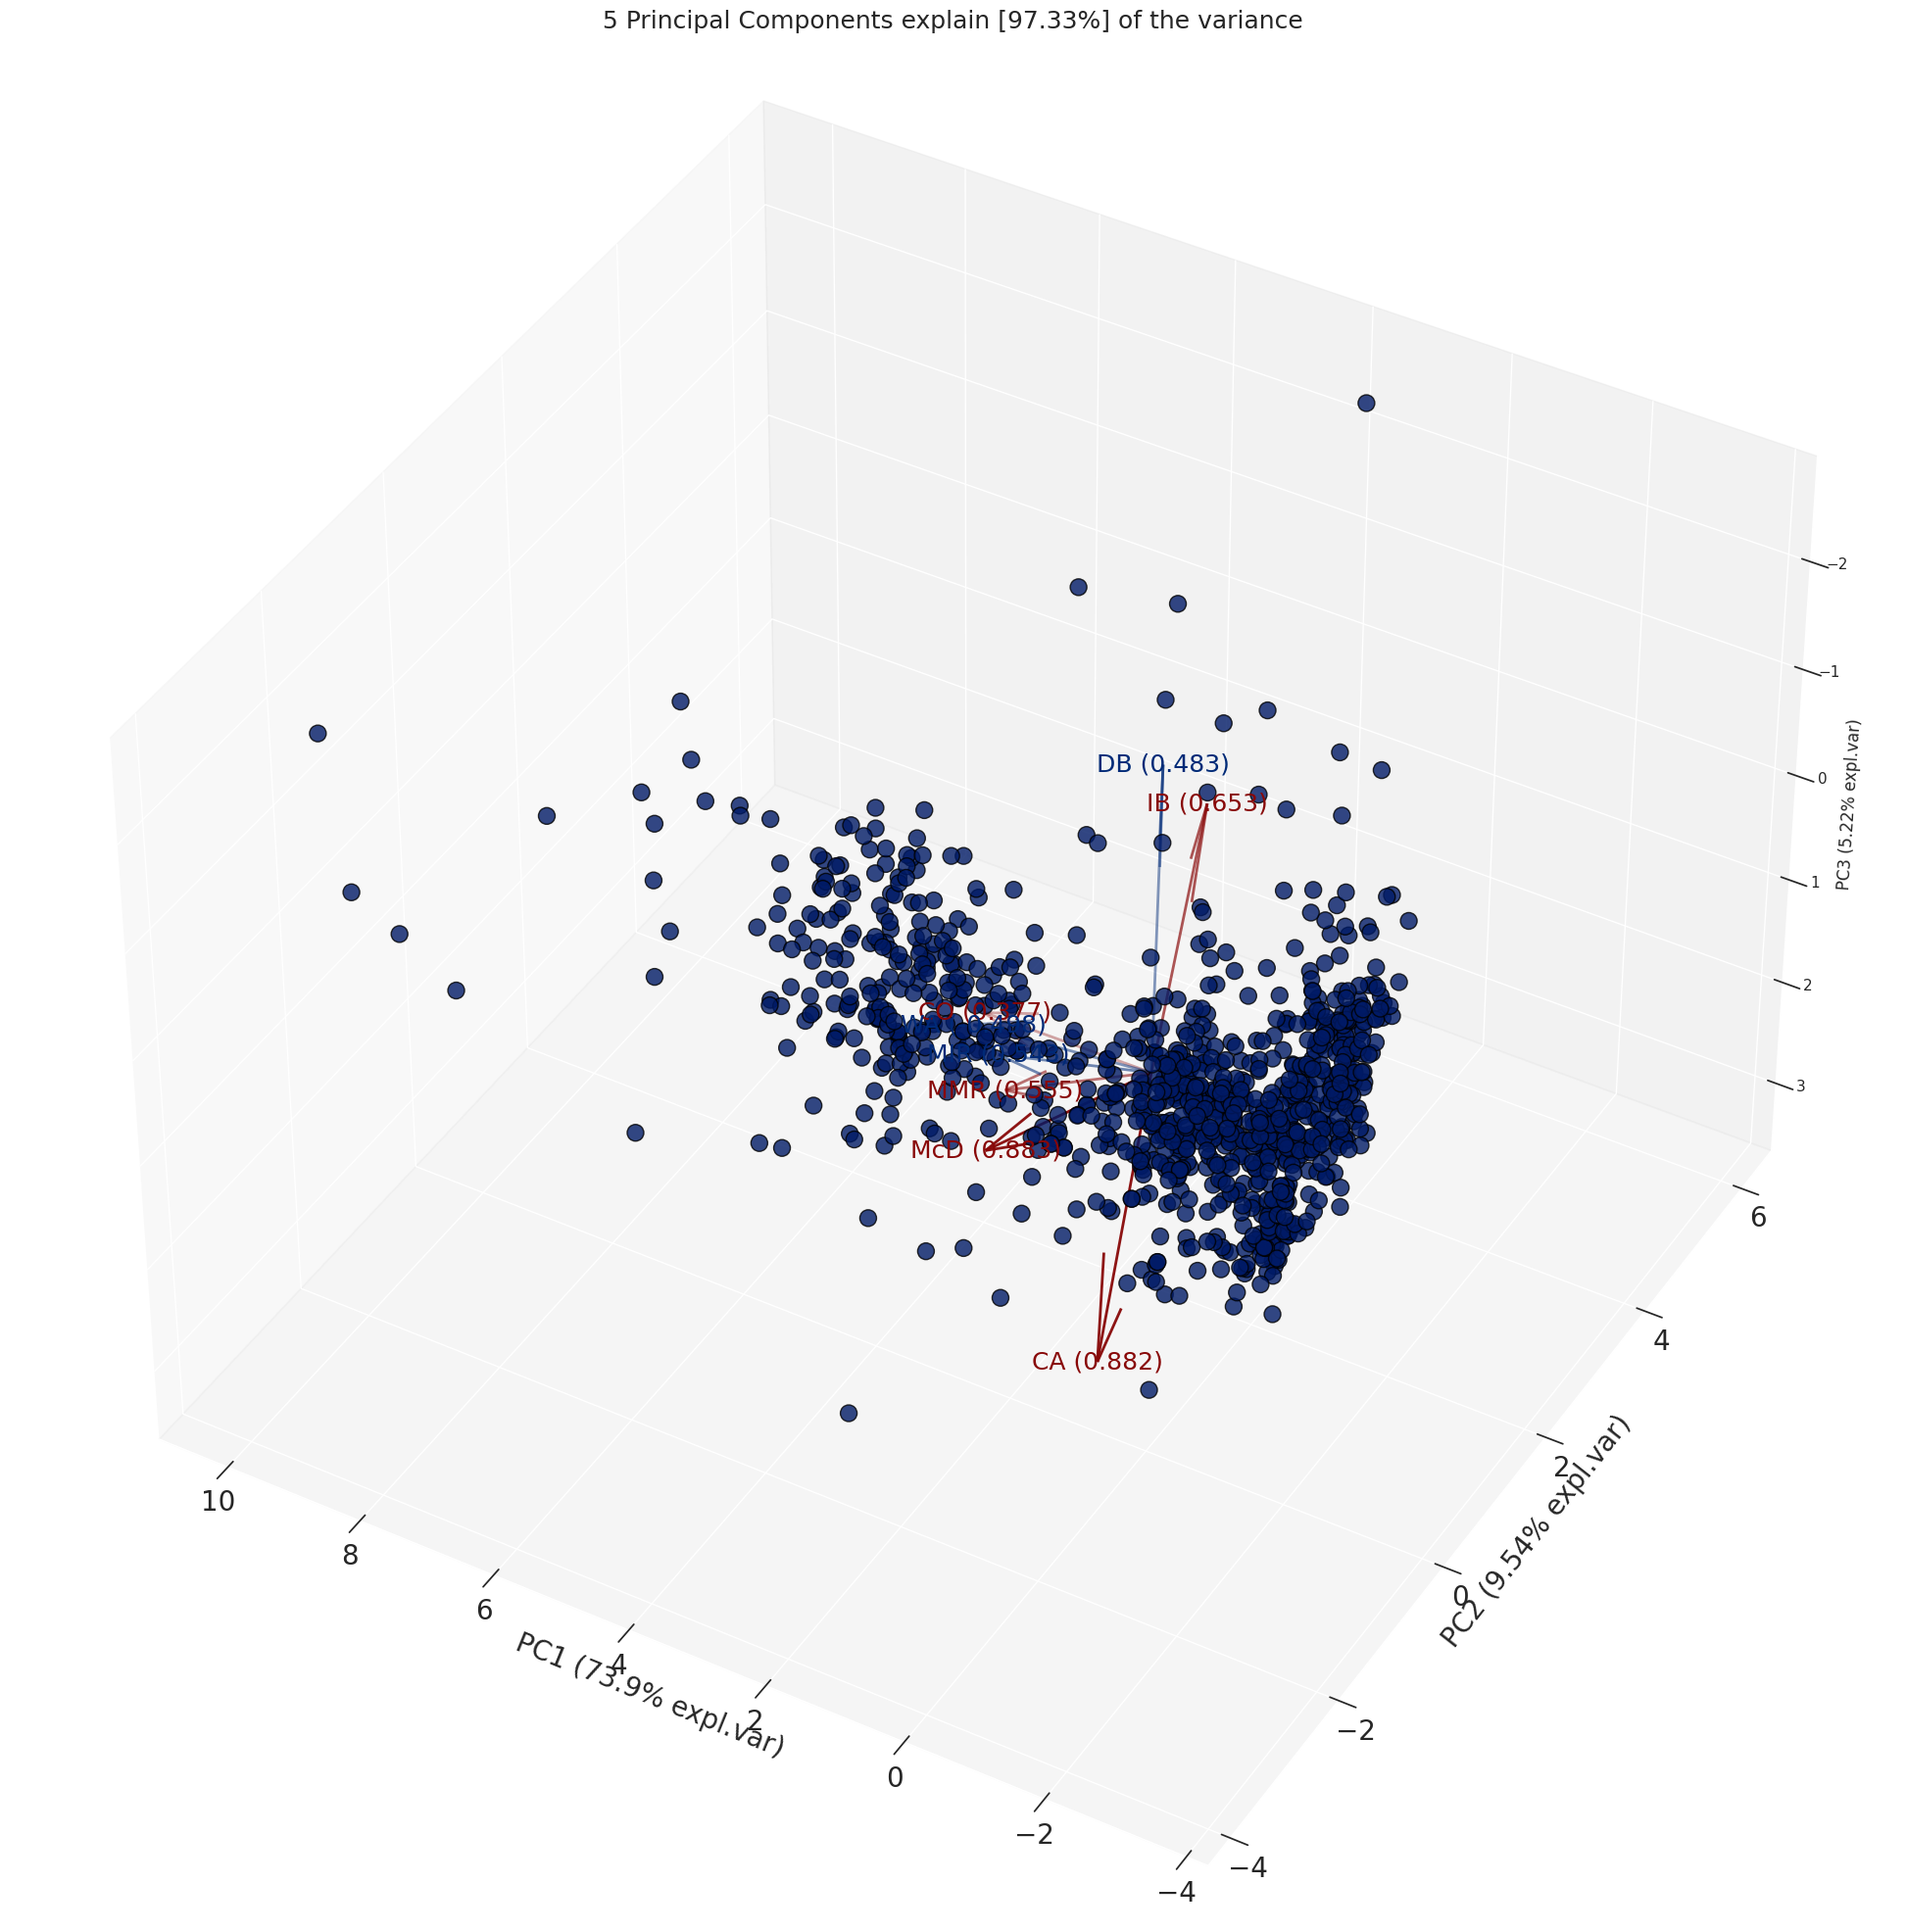

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [97.33%] of the variance'}, xlabel='PC1 (73.9% expl.var)', ylabel='PC2 (9.54% expl.var)', zlabel='PC3 (5.22% expl.var)'>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jasleenkaur24/INSE-6220/main/costofL.csv')
df.head(15)

MIR    MMR   McD    DB    IB    CA    CO    WA  class
0   4.90  22.04  4.28  1.84  3.67  1.78  0.48  0.19      1
1   5.59  40.51  5.59  1.12  4.19  3.96  0.52  0.32      1
2   2.54  22.25  3.50  2.02  3.18  2.19  0.59  0.27      1
3   3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51      1
4   7.16  52.77  6.03  3.02  4.52  3.86  1.46  0.78      1
5   2.60  28.09  5.62  2.25  4.21  2.06  0.50  0.26      1
6   2.00  14.69  3.67  2.20  3.67  1.60  0.36  0.15      1
7   4.05  27.94  4.89  0.84  1.68  3.41  0.44  0.32      1
8   3.67  18.36  3.67  2.45  4.28  2.49  0.46  0.19      1
9   4.19  30.73  5.59  1.40  4.05  4.55  0.51  0.43      1
10  7.22  43.31  5.47  3.25  3.61  3.19  1.17  0.78      1
11  3.38  45.06  6.76  1.13  1.80  3.40  0.39  0.26      1
12  2.23  11.14  3.56  2.12  2.67  1.39  0.29  0.18      1
13  1.87  11.24  4.68  5.62  4.92  1.89  0.27  0.15      1
14  7.45  37.27  6.52  2.24  3.35  1.51  1.08  0.75      1

In [ ]:
df["class"].unique()
print(df.count())

MIR      1034
MMR      1034
McD      1034
DB       1034
IB       1034
CA       1034
CO       1034
WA       1034
class    1034
dtype: int64


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
print(data.count())
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

MIR      931
MMR      931
McD      931
DB       931
IB       931
CA       931
CO       931
WA       931
class    931
dtype: int64
Data for Modeling: (931, 9)
Unseen Data For Predictions: (103, 9)


In [ ]:
data_unseen

MIR    MMR   McD    DB    IB    CA    CO    WA  class
0     3.54  27.40  3.54  1.24  1.90  2.91  0.93  0.51      1
1     2.60  28.09  5.62  2.25  4.21  2.06  0.50  0.26      1
2     4.19  27.94  4.89  1.12  3.91  4.14  0.47  0.33      1
3     2.02  20.03  5.21  0.81  1.62  1.89  0.43  0.27      1
4     3.14  18.86  6.15  0.56  1.68  2.51  0.42  0.28      0
..     ...    ...   ...   ...   ...   ...   ...   ...    ...
98   17.50  54.73  6.00  2.73  4.00  4.44  2.07  1.86      0
99    3.46  39.92  6.65  1.33  1.60  3.19  0.80  0.27      0
100   6.32  27.37  6.53  1.47  1.21  1.47  0.73  0.32      0
101   2.01   8.05  3.08  1.61  2.41  1.10  0.54  0.27      0
102   6.32  23.16  3.37  0.81  1.32  1.05  0.68  0.32      0

[103 rows x 9 columns]

In [ ]:
print(data_unseen.count())

MIR      103
MMR      103
McD      103
DB       103
IB       103
CA       103
CO       103
WA       103
class    103
dtype: int64


In [ ]:
print(data.index)

RangeIndex(start=0, stop=931, step=1)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models

* Naive Bayes Classifier ('nb')
* Ridge Classifier ('ridge')
* Linear Discriminant Classifier ('lda')


**Create Naive Bayes Classifier**

In [ ]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'nb'. 
nb

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Naive Bayes Model**

In [ ]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_nb

GaussianNB(priors=None, var_smoothing=1)

**Evaluate Naive Bayes Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

** *italicized text*Create Ridge Classifier Model**

In [ ]:
ridge= create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Ridge Classifier Model**

In [ ]:
tuned_ridge = tune_model(ridge)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Ridge Classifier Model**

In [ ]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Linear Discriminant Model**

In [ ]:
lda = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]



```
# This is formatted as code
```

**Tune Linear Discriminant Model**

In [ ]:
tuned_lda = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Linear Discriminant Model**

In [ ]:
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

** *italicized text*Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model_pca

RidgeClassifier(alpha=6.95, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

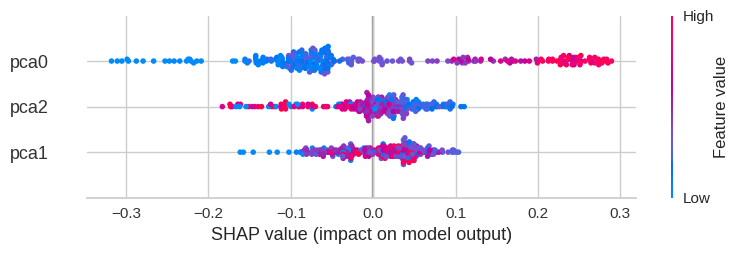

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=62)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 62). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')